In [1]:
import numpy as np
import xarray as xr
import scipy.stats as st
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import requests
import os,errno
import sys
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import datetime as dt
import pandas as pd
import time
import urllib.request
import metpy.calc as mpcalc
import salem
import scipy.optimize as opt
import warnings
import geopy.distance
import matplotlib as mpl
from scipy.spatial import ConvexHull

from scipy.ndimage.measurements import label
from scipy.ndimage import binary_dilation

warnings.filterwarnings('ignore')

dir_data='/Volumes/Extreme Pro/'
dir3='/Volumes/My Passport/'
dir2='/Volumes/Extreme Pro/'

/var/folders/ql/bxfj9fdd15xfw55_bmktgrf80000gn/T/ipykernel_83020/2316724702.py:24: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


In [2]:
ds=xr.open_dataset(dir_data+'time_series_simple_era5_land.nc')#_land
area_list_era5_fixed=ds['area_list_era5_fixed'].values.tolist()
ivt_list_era5_fixed=ds['ivt_list_era5_fixed'].values.tolist()
iwv_list_era5_fixed=ds['iwv_list_era5_fixed'].values.tolist()
s_list_era5_fixed=ds['s_list_era5_fixed'].values.tolist()
mfc_list_era5_fixed=ds['mfc_list_era5_fixed'].values.tolist()

area_list_era5_fixed_poleward=ds['area_list_era5_poleward'].values.tolist()
ivt_list_era5_fixed_poleward=ds['ivt_list_era5_poleward'].values.tolist()
iwv_list_era5_fixed_poleward=ds['iwv_list_era5_poleward'].values.tolist()
s_list_era5_fixed_poleward=ds['s_list_era5_poleward'].values.tolist()
mfc_list_era5_fixed_poleward=ds['mfc_list_era5_poleward'].values.tolist()

area_list_era5_variable=ds['area_list_era5_variable'].values.tolist()
ivt_list_era5_variable=ds['ivt_list_era5_variable'].values.tolist()
iwv_list_era5_variable=ds['iwv_list_era5_variable'].values.tolist()
s_list_era5_variable=ds['s_list_era5_variable'].values.tolist()
mfc_list_era5_variable=ds['mfc_list_era5_variable'].values.tolist()


ds=xr.open_dataset(dir_data+'time_series_simple_merra2_land.nc')
area_list_merra2_fixed=ds['area_list_merra2_fixed'].values.tolist()
ivt_list_merra2_fixed=ds['ivt_list_merra2_fixed'].values.tolist()
iwv_list_merra2_fixed=ds['iwv_list_merra2_fixed'].values.tolist()
s_list_merra2_fixed=ds['s_list_merra2_fixed'].values.tolist()
mfc_list_merra2_fixed=ds['mfc_list_merra2_fixed'].values.tolist()

area_list_merra2_fixed_poleward=ds['area_list_merra2_poleward'].values.tolist()
ivt_list_merra2_fixed_poleward=ds['ivt_list_merra2_poleward'].values.tolist()
iwv_list_merra2_fixed_poleward=ds['iwv_list_merra2_poleward'].values.tolist()
s_list_merra2_fixed_poleward=ds['s_list_merra2_poleward'].values.tolist()
mfc_list_merra2_fixed_poleward=ds['mfc_list_merra2_poleward'].values.tolist()

area_list_merra2_variable=ds['area_list_merra2_variable'].values.tolist()
ivt_list_merra2_variable=ds['ivt_list_merra2_variable'].values.tolist()
iwv_list_merra2_variable=ds['iwv_list_merra2_variable'].values.tolist()
s_list_merra2_variable=ds['s_list_merra2_variable'].values.tolist()
mfc_list_merra2_variable=ds['mfc_list_merra2_variable'].values.tolist()


ds=xr.open_dataset(dir_data+'time_series_simple_jra55_land.nc')
area_list_jra55_fixed=ds['area_list_jra55_fixed'].values.tolist()
ivt_list_jra55_fixed=ds['ivt_list_jra55_fixed'].values.tolist()
iwv_list_jra55_fixed=ds['iwv_list_jra55_fixed'].values.tolist()
s_list_jra55_fixed=ds['s_list_jra55_fixed'].values.tolist()

area_list_jra55_fixed_poleward=ds['area_list_jra55_poleward'].values.tolist()
ivt_list_jra55_fixed_poleward=ds['ivt_list_jra55_poleward'].values.tolist()
iwv_list_jra55_fixed_poleward=ds['iwv_list_jra55_poleward'].values.tolist()
s_list_jra55_fixed_poleward=ds['s_list_jra55_poleward'].values.tolist()

area_list_jra55_variable=ds['area_list_jra55_variable'].values.tolist()
ivt_list_jra55_variable=ds['ivt_list_jra55_variable'].values.tolist()
iwv_list_jra55_variable=ds['iwv_list_jra55_variable'].values.tolist()
s_list_jra55_variable=ds['s_list_jra55_variable'].values.tolist()


ds=xr.open_dataset(dir_data+'time_series_simple_era5tp_land.nc')
area_list_era5tp=ds['area_list_era5tp'].values.tolist()
ivt_list_era5tp=ds['ivt_list_era5tp'].values.tolist()
iwv_list_era5tp=ds['iwv_list_era5tp'].values.tolist()
s_list_era5tp=ds['s_list_era5tp'].values.tolist()
mfc_list_era5tp=ds['mfc_list_era5tp'].values.tolist()

#ds=xr.open_dataset(dir_data+'time_series_simple_era5mk_fixed.nc')
ds=xr.open_dataset(dir_data+'time_series_simple_era5mk_land.nc')
area_list_era5mk=ds['area_list_era5mk'].values.tolist()
ivt_list_era5mk=ds['ivt_list_era5mk'].values.tolist()
iwv_list_era5mk=ds['iwv_list_era5mk'].values.tolist()
s_list_era5mk=ds['s_list_era5mk'].values.tolist()
mfc_list_era5mk=ds['mfc_list_era5mk'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2ac_land.nc')
area_list_merra2ac=ds['area_list_merra2ac'].values.tolist()
ivt_list_merra2ac=ds['ivt_list_merra2ac'].values.tolist()
iwv_list_merra2ac=ds['iwv_list_merra2ac'].values.tolist()
s_list_merra2ac=ds['s_list_merra2ac'].values.tolist()
mfc_list_merra2ac=ds['mfc_list_merra2ac'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2lo_land.nc')
area_list_merra2lo=ds['area_list_merra2lo'].values.tolist()
ivt_list_merra2lo=ds['ivt_list_merra2lo'].values.tolist()
iwv_list_merra2lo=ds['iwv_list_merra2lo'].values.tolist()
s_list_merra2lo=ds['s_list_merra2lo'].values.tolist()
mfc_list_merra2lo=ds['mfc_list_merra2lo'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_jra55gw_land.nc')
area_list_jra55gw=ds['area_list_jra55gw'].values.tolist()
ivt_list_jra55gw=ds['ivt_list_jra55gw'].values.tolist()
iwv_list_jra55gw=ds['iwv_list_jra55gw'].values.tolist()
s_list_jra55gw=ds['s_list_jra55gw'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2cndl_land.nc')
area_list_merra2cndl=ds['area_list_merra2cndl'].values.tolist()
ivt_list_merra2cndl=ds['ivt_list_merra2cndl'].values.tolist()
iwv_list_merra2cndl=ds['iwv_list_merra2cndl'].values.tolist()
s_list_merra2cndl=ds['s_list_merra2cndl'].values.tolist()
mfc_list_merra2cndl=ds['mfc_list_merra2cndl'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_era5reid_land.nc')
area_list_era5reid=ds['area_list_era5reid'].values.tolist()
ivt_list_era5reid=ds['ivt_list_era5reid'].values.tolist()
iwv_list_era5reid=ds['iwv_list_era5reid'].values.tolist()
s_list_era5reid=ds['s_list_era5reid'].values.tolist()
mfc_list_era5reid=ds['mfc_list_era5reid'].values.tolist()

In [3]:
sigs_list=[]

mean=float(sum(ivt_list_era5_variable[40:]))/float(len(ivt_list_era5_variable[40:]))
new_era5_variable=[x/mean for x in ivt_list_era5_variable]
mean=float(sum(ivt_list_era5_fixed[40:]))/float(len(ivt_list_era5_fixed[40:]))
new_era5_fixed=[x/mean for x in ivt_list_era5_fixed]
mean=float(sum(ivt_list_era5_fixed_poleward[40:]))/float(len(ivt_list_era5_fixed_poleward[40:]))
new_era5_fixed_poleward=[x/mean for x in ivt_list_era5_fixed_poleward]

mean=float(sum(ivt_list_merra2_variable))/float(len(ivt_list_merra2_variable))
new_merra2_variable=[x/mean for x in ivt_list_merra2_variable]
mean=float(sum(ivt_list_merra2_fixed))/float(len(ivt_list_merra2_fixed))
new_merra2_fixed=[x/mean for x in ivt_list_merra2_fixed]
mean=float(sum(ivt_list_merra2_fixed_poleward))/float(len(ivt_list_merra2_fixed_poleward))
new_merra2_fixed_poleward=[x/mean for x in ivt_list_merra2_fixed_poleward]

mean=float(sum(ivt_list_jra55_variable[22:]))/float(len(ivt_list_jra55_variable[22:]))
new_jra55_variable=[x/mean for x in ivt_list_jra55_variable]
mean=float(sum(ivt_list_jra55_fixed[22:]))/float(len(ivt_list_jra55_fixed[22:]))
new_jra55_fixed=[x/mean for x in ivt_list_jra55_fixed]
mean=float(sum(ivt_list_jra55_fixed_poleward[22:]))/float(len(ivt_list_jra55_fixed_poleward[22:]))
new_jra55_fixed_poleward=[x/mean for x in ivt_list_jra55_fixed_poleward]


list_all=ivt_list_era5_variable[40:]+ivt_list_era5_fixed[40:]+ivt_list_era5_fixed_poleward[40:]+ivt_list_jra55_variable[22:]+ivt_list_jra55_fixed[22:]+ivt_list_jra55_fixed_poleward[22:]+ivt_list_merra2_variable+ivt_list_merra2_fixed+ivt_list_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all

test_array=np.zeros((9,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa1=[np.nan]*18+new_jra55_fixed
testb1=[np.nan]*18+new_jra55_fixed_poleward
testc1=[np.nan]*18+new_jra55_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa1
test_array[4,:]=testb1
test_array[5,:]=testc1
test_array[6,:]=testa2
test_array[7,:]=testb2
test_array[8,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)


mean=float(sum(ivt_list_era5tp))/float(len(ivt_list_era5tp))
new_era5tp=[x/mean for x in ivt_list_era5tp]
mean=float(sum(ivt_list_era5reid))/float(len(ivt_list_era5reid))
new_era5reid=[x/mean for x in ivt_list_era5reid]
mean=float(sum(ivt_list_era5mk))/float(len(ivt_list_era5mk))
new_era5mk=[x/mean for x in ivt_list_era5mk]

mean=float(sum(ivt_list_merra2lo))/float(len(ivt_list_merra2lo))
new_merra2lo=[x/mean for x in ivt_list_merra2lo]
mean=float(sum(ivt_list_merra2cndl))/float(len(ivt_list_merra2cndl))
new_merra2cndl=[x/mean for x in ivt_list_merra2cndl]
mean=float(sum(ivt_list_merra2ac))/float(len(ivt_list_merra2ac))
new_merra2ac=[x/mean for x in ivt_list_merra2ac]

mean=float(sum(ivt_list_jra55gw))/float(len(ivt_list_jra55gw))
new_jra55gw=[x/mean for x in ivt_list_jra55gw]

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1

change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])
    
    
test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])


test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.
    
zipped_local=list(zip(slopes_local,sigs_local))
sel_pos=[x for x in zipped_local if x[0]>0 and x[1]<0.03551]
sel_neg=[x for x in zipped_local if x[0]<0 and x[1]<0.03551]
num_pos=len(sel_pos)
num_neg=len(sel_neg)

test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)*100

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_era5tp))/float(len(ivt_list_era5tp))
label_1='TempestLR ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_era5reid))/float(len(ivt_list_era5reid))
label_2='Reid500 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_era5mk))/float(len(ivt_list_era5mk))
label_3='Mundhenk_v3 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_merra2lo))/float(len(ivt_list_merra2lo))
label_4='Lora_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_merra2cndl))/float(len(ivt_list_merra2cndl))
label_5='ClimateNet_DL MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_merra2ac))/float(len(ivt_list_merra2ac))
label_6='ARCONNECT_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_jra55gw))/float(len(ivt_list_jra55gw))
label_7='GuanWaliser JRA-55 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_land_ivt=sigs_list

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_ivt_land=change_list

label='Variants ('+'$\Delta$='+str(round(change,2))+'%, '+str(num_pos)+' pos, '+str(num_neg)+' neg)'

396


In [4]:
sigs_list=[]
mean=float(sum(iwv_list_era5_variable[40:]))/float(len(iwv_list_era5_variable[40:]))
new_era5_variable=[x/mean for x in iwv_list_era5_variable]
mean=float(sum(iwv_list_era5_fixed[40:]))/float(len(iwv_list_era5_fixed[40:]))
new_era5_fixed=[x/mean for x in iwv_list_era5_fixed]
mean=float(sum(iwv_list_era5_fixed_poleward[40:]))/float(len(iwv_list_era5_fixed_poleward[40:]))
new_era5_fixed_poleward=[x/mean for x in iwv_list_era5_fixed_poleward]

mean=float(sum(iwv_list_merra2_variable))/float(len(iwv_list_merra2_variable))
new_merra2_variable=[x/mean for x in iwv_list_merra2_variable]
mean=float(sum(iwv_list_merra2_fixed))/float(len(iwv_list_merra2_fixed))
new_merra2_fixed=[x/mean for x in iwv_list_merra2_fixed]
mean=float(sum(iwv_list_merra2_fixed_poleward))/float(len(iwv_list_merra2_fixed_poleward))
new_merra2_fixed_poleward=[x/mean for x in iwv_list_merra2_fixed_poleward]

mean=float(sum(iwv_list_jra55_variable[22:]))/float(len(iwv_list_jra55_variable[22:]))
new_jra55_variable=[x/mean for x in iwv_list_jra55_variable]
mean=float(sum(iwv_list_jra55_fixed[22:]))/float(len(iwv_list_jra55_fixed[22:]))
new_jra55_fixed=[x/mean for x in iwv_list_jra55_fixed]
mean=float(sum(iwv_list_jra55_fixed_poleward[22:]))/float(len(iwv_list_jra55_fixed_poleward[22:]))
new_jra55_fixed_poleward=[x/mean for x in iwv_list_jra55_fixed_poleward]


list_all=iwv_list_era5_variable[40:]+iwv_list_era5_fixed[40:]+iwv_list_era5_fixed_poleward[40:]+iwv_list_jra55_variable[22:]+iwv_list_jra55_fixed[22:]+iwv_list_jra55_fixed_poleward[22:]+iwv_list_merra2_variable+iwv_list_merra2_fixed+iwv_list_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all

test_array=np.zeros((9,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa1=[np.nan]*18+new_jra55_fixed
testb1=[np.nan]*18+new_jra55_fixed_poleward
testc1=[np.nan]*18+new_jra55_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa1
test_array[4,:]=testb1
test_array[5,:]=testc1
test_array[6,:]=testa2
test_array[7,:]=testb2
test_array[8,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)


mean=float(sum(iwv_list_era5tp))/float(len(iwv_list_era5tp))
new_era5tp=[x/mean for x in iwv_list_era5tp]
mean=float(sum(iwv_list_era5reid))/float(len(iwv_list_era5reid))
new_era5reid=[x/mean for x in iwv_list_era5reid]
mean=float(sum(iwv_list_era5mk))/float(len(iwv_list_era5mk))
new_era5mk=[x/mean for x in iwv_list_era5mk]

mean=float(sum(iwv_list_merra2lo))/float(len(iwv_list_merra2lo))
new_merra2lo=[x/mean for x in iwv_list_merra2lo]
mean=float(sum(iwv_list_merra2cndl))/float(len(iwv_list_merra2cndl))
new_merra2cndl=[x/mean for x in iwv_list_merra2cndl]
mean=float(sum(iwv_list_merra2ac))/float(len(iwv_list_merra2ac))
new_merra2ac=[x/mean for x in iwv_list_merra2ac]

mean=float(sum(iwv_list_jra55gw))/float(len(iwv_list_jra55gw))
new_jra55gw=[x/mean for x in iwv_list_jra55gw]

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1

change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])


test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    
change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

zipped_local=list(zip(slopes_local,sigs_local))
sel_pos=[x for x in zipped_local if x[0]>0 and x[1]<0.03551]
sel_neg=[x for x in zipped_local if x[0]<0 and x[1]<0.03551]
num_pos=len(sel_pos)
num_neg=len(sel_neg)

test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)*100.

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_era5tp))/float(len(iwv_list_era5tp))
change1=change1*100.
label_1='TempestLR ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_era5reid))/float(len(iwv_list_era5reid))
change1=change1*100.
label_2='Reid500 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_era5mk))/float(len(iwv_list_era5mk))
change1=change1*100.
label_3='Mundhenk_v3 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_merra2lo))/float(len(iwv_list_merra2lo))
change1=change1*100.
label_4='Lora_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_merra2cndl))/float(len(iwv_list_merra2cndl))
change1=change1*100.
label_5='ClimateNet_DL MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_merra2ac))/float(len(iwv_list_merra2ac))
change1=change1*100.
label_6='ARCONNECT_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_jra55gw))/float(len(iwv_list_jra55gw))
change1=change1*100.
label_7='GuanWaliser JRA-55 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_land_iwv=sigs_list

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_iwv_land=change_list

label='Variants ('+'$\Delta$='+str(round(change,2))+'%, '+str(num_pos)+' pos, '+str(num_neg)+' neg)'

396


In [5]:
sigs_list=[]
mean=float(sum(s_list_era5_variable[40:]))/float(len(s_list_era5_variable[40:]))
new_era5_variable=[x/mean for x in s_list_era5_variable]
mean=float(sum(s_list_era5_fixed[40:]))/float(len(s_list_era5_fixed[40:]))
new_era5_fixed=[x/mean for x in s_list_era5_fixed]
mean=float(sum(s_list_era5_fixed_poleward[40:]))/float(len(s_list_era5_fixed_poleward[40:]))
new_era5_fixed_poleward=[x/mean for x in s_list_era5_fixed_poleward]

mean=float(sum(s_list_merra2_variable))/float(len(s_list_merra2_variable))
new_merra2_variable=[x/mean for x in s_list_merra2_variable]
mean=float(sum(s_list_merra2_fixed))/float(len(s_list_merra2_fixed))
new_merra2_fixed=[x/mean for x in s_list_merra2_fixed]
mean=float(sum(s_list_merra2_fixed_poleward))/float(len(s_list_merra2_fixed_poleward))
new_merra2_fixed_poleward=[x/mean for x in s_list_merra2_fixed_poleward]

mean=float(sum(s_list_jra55_variable[22:]))/float(len(s_list_jra55_variable[22:]))
new_jra55_variable=[x/mean for x in s_list_jra55_variable]
mean=float(sum(s_list_jra55_fixed[22:]))/float(len(s_list_jra55_fixed[22:]))
new_jra55_fixed=[x/mean for x in s_list_jra55_fixed]
mean=float(sum(s_list_jra55_fixed_poleward[22:]))/float(len(s_list_jra55_fixed_poleward[22:]))
new_jra55_fixed_poleward=[x/mean for x in s_list_jra55_fixed_poleward]


list_all=s_list_era5_variable[40:]+s_list_era5_fixed[40:]+s_list_era5_fixed_poleward[40:]+s_list_jra55_variable[22:]+s_list_jra55_fixed[22:]+s_list_jra55_fixed_poleward[22:]+s_list_merra2_variable+s_list_merra2_fixed+s_list_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all

test_array=np.zeros((9,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa1=[np.nan]*18+new_jra55_fixed
testb1=[np.nan]*18+new_jra55_fixed_poleward
testc1=[np.nan]*18+new_jra55_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa1
test_array[4,:]=testb1
test_array[5,:]=testc1
test_array[6,:]=testa2
test_array[7,:]=testb2
test_array[8,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)


mean=float(sum(s_list_era5tp))/float(len(s_list_era5tp))
new_era5tp=[x/mean for x in s_list_era5tp]
mean=float(sum(s_list_era5reid))/float(len(s_list_era5reid))
new_era5reid=[x/mean for x in s_list_era5reid]
mean=float(sum(s_list_era5mk))/float(len(s_list_era5mk))
new_era5mk=[x/mean for x in s_list_era5mk]

mean=float(sum(s_list_merra2lo))/float(len(s_list_merra2lo))
new_merra2lo=[x/mean for x in s_list_merra2lo]
mean=float(sum(s_list_merra2cndl))/float(len(s_list_merra2cndl))
new_merra2cndl=[x/mean for x in s_list_merra2cndl]
mean=float(sum(s_list_merra2ac))/float(len(s_list_merra2ac))
new_merra2ac=[x/mean for x in s_list_merra2ac]

mean=float(sum(s_list_jra55gw))/float(len(s_list_jra55gw))
new_jra55gw=[x/mean for x in s_list_jra55gw]

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])


test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    
change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

zipped_local=list(zip(slopes_local,sigs_local))
sel_pos=[x for x in zipped_local if x[0]>0 and x[1]<0.03551]
sel_neg=[x for x in zipped_local if x[0]<0 and x[1]<0.03551]
num_pos=len(sel_pos)
num_neg=len(sel_neg)

test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)*100

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_era5tp))/float(len(s_list_era5tp))
label_1='TempestLR ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_era5reid))/float(len(s_list_era5reid))
label_2='Reid500 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_era5mk))/float(len(s_list_era5mk))
label_3='Mundhenk_v3 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_merra2lo))/float(len(s_list_merra2lo))
label_4='Lora_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_merra2cndl))/float(len(s_list_merra2cndl))
label_5='ClimateNet_DL MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_merra2ac))/float(len(s_list_merra2ac))
label_6='ARCONNECT_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_jra55gw))/float(len(s_list_jra55gw))
label_7='GuanWaliser JRA-55 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_land_s=sigs_list

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_s_land=change_list

label='Variants ('+'$\Delta$='+str(round(change,2))+'%, '+str(num_pos)+' pos, '+str(num_neg)+' neg)'

396


In [6]:
sigs_list=[]
mean=float(sum(mfc_list_era5_variable[40:]))/float(len(mfc_list_era5_variable[40:]))
new_era5_variable=[x/mean for x in mfc_list_era5_variable]
mean=float(sum(mfc_list_era5_fixed[40:]))/float(len(mfc_list_era5_fixed[40:]))
new_era5_fixed=[x/mean for x in mfc_list_era5_fixed]
mean=float(sum(mfc_list_era5_fixed_poleward[40:]))/float(len(mfc_list_era5_fixed_poleward[40:]))
new_era5_fixed_poleward=[x/mean for x in mfc_list_era5_fixed_poleward]

mean=float(sum(mfc_list_merra2_variable))/float(len(mfc_list_merra2_variable))
new_merra2_variable=[x/mean for x in mfc_list_merra2_variable]
mean=float(sum(mfc_list_merra2_fixed))/float(len(mfc_list_merra2_fixed))
new_merra2_fixed=[x/mean for x in mfc_list_merra2_fixed]
mean=float(sum(mfc_list_merra2_fixed_poleward))/float(len(mfc_list_merra2_fixed_poleward))
new_merra2_fixed_poleward=[x/mean for x in mfc_list_merra2_fixed_poleward]


list_all=mfc_list_era5_variable[40:]+mfc_list_era5_fixed[40:]+mfc_list_era5_fixed_poleward[40:]+mfc_list_merra2_variable+mfc_list_merra2_fixed+mfc_list_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all

test_array=np.zeros((6,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa2
test_array[4,:]=testb2
test_array[5,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)


mean=float(sum(mfc_list_era5tp))/float(len(mfc_list_era5tp))
new_era5tp=[x/mean for x in mfc_list_era5tp]
mean=float(sum(mfc_list_era5reid))/float(len(mfc_list_era5reid))
new_era5reid=[x/mean for x in mfc_list_era5reid]
mean=float(sum(mfc_list_era5mk))/float(len(mfc_list_era5mk))
new_era5mk=[x/mean for x in mfc_list_era5mk]

mean=float(sum(mfc_list_merra2lo))/float(len(mfc_list_merra2lo))
new_merra2lo=[x/mean for x in mfc_list_merra2lo]
mean=float(sum(mfc_list_merra2cndl))/float(len(mfc_list_merra2cndl))
new_merra2cndl=[x/mean for x in mfc_list_merra2cndl]
mean=float(sum(mfc_list_merra2ac))/float(len(mfc_list_merra2ac))
new_merra2ac=[x/mean for x in mfc_list_merra2ac]

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])


test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    
change_mean_variable=float(sum(change_variable))/2.
change_mean_fixed=float(sum(change_fixed))/2.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/2.

zipped_local=list(zip(slopes_local,sigs_local))
sel_pos=[x for x in zipped_local if x[0]>0 and x[1]<0.03551]
sel_neg=[x for x in zipped_local if x[0]<0 and x[1]<0.03551]
num_pos=len(sel_pos)
num_neg=len(sel_neg)

test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)*100

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_era5tp))/float(len(mfc_list_era5tp))
label_1='TempestLR ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_era5reid))/float(len(mfc_list_era5reid))
label_2='Reid500 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_era5mk))/float(len(mfc_list_era5mk))
label_3='Mundhenk_v3 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_merra2lo))/float(len(mfc_list_merra2lo))
label_4='Lora_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_merra2cndl))/float(len(mfc_list_merra2cndl))
label_5='ClimateNet_DL MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_merra2ac))/float(len(mfc_list_merra2ac))
label_6='ARCONNECT_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_land_mfc=sigs_list

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_mfc_land=change_list
label='Variants ('+'$\Delta$='+str(round(change,2))+'%, '+str(num_pos)+' pos, '+str(num_neg)+' neg)'

264


In [7]:
ds=xr.open_dataset(dir_data+'time_series_simple_era5.nc')#_land
area_list_era5_fixed=ds['area_list_era5_fixed'].values.tolist()
ivt_list_era5_fixed=ds['ivt_list_era5_fixed'].values.tolist()
iwv_list_era5_fixed=ds['iwv_list_era5_fixed'].values.tolist()
s_list_era5_fixed=ds['s_list_era5_fixed'].values.tolist()
mfc_list_era5_fixed=ds['mfc_list_era5_fixed'].values.tolist()

area_list_era5_fixed_poleward=ds['area_list_era5_poleward'].values.tolist()
ivt_list_era5_fixed_poleward=ds['ivt_list_era5_poleward'].values.tolist()
iwv_list_era5_fixed_poleward=ds['iwv_list_era5_poleward'].values.tolist()
s_list_era5_fixed_poleward=ds['s_list_era5_poleward'].values.tolist()
mfc_list_era5_fixed_poleward=ds['mfc_list_era5_poleward'].values.tolist()

area_list_era5_variable=ds['area_list_era5_variable'].values.tolist()
ivt_list_era5_variable=ds['ivt_list_era5_variable'].values.tolist()
iwv_list_era5_variable=ds['iwv_list_era5_variable'].values.tolist()
s_list_era5_variable=ds['s_list_era5_variable'].values.tolist()
mfc_list_era5_variable=ds['mfc_list_era5_variable'].values.tolist()


ds=xr.open_dataset(dir_data+'time_series_simple_merra2.nc')
area_list_merra2_fixed=ds['area_list_merra2_fixed'].values.tolist()
ivt_list_merra2_fixed=ds['ivt_list_merra2_fixed'].values.tolist()
iwv_list_merra2_fixed=ds['iwv_list_merra2_fixed'].values.tolist()
s_list_merra2_fixed=ds['s_list_merra2_fixed'].values.tolist()
mfc_list_merra2_fixed=ds['mfc_list_merra2_fixed'].values.tolist()

area_list_merra2_fixed_poleward=ds['area_list_merra2_poleward'].values.tolist()
ivt_list_merra2_fixed_poleward=ds['ivt_list_merra2_poleward'].values.tolist()
iwv_list_merra2_fixed_poleward=ds['iwv_list_merra2_poleward'].values.tolist()
s_list_merra2_fixed_poleward=ds['s_list_merra2_poleward'].values.tolist()
mfc_list_merra2_fixed_poleward=ds['mfc_list_merra2_poleward'].values.tolist()

area_list_merra2_variable=ds['area_list_merra2_variable'].values.tolist()
ivt_list_merra2_variable=ds['ivt_list_merra2_variable'].values.tolist()
iwv_list_merra2_variable=ds['iwv_list_merra2_variable'].values.tolist()
s_list_merra2_variable=ds['s_list_merra2_variable'].values.tolist()
mfc_list_merra2_variable=ds['mfc_list_merra2_variable'].values.tolist()


ds=xr.open_dataset(dir_data+'time_series_simple_jra55.nc')
area_list_jra55_fixed=ds['area_list_jra55_fixed'].values.tolist()
ivt_list_jra55_fixed=ds['ivt_list_jra55_fixed'].values.tolist()
iwv_list_jra55_fixed=ds['iwv_list_jra55_fixed'].values.tolist()
s_list_jra55_fixed=ds['s_list_jra55_fixed'].values.tolist()

area_list_jra55_fixed_poleward=ds['area_list_jra55_poleward'].values.tolist()
ivt_list_jra55_fixed_poleward=ds['ivt_list_jra55_poleward'].values.tolist()
iwv_list_jra55_fixed_poleward=ds['iwv_list_jra55_poleward'].values.tolist()
s_list_jra55_fixed_poleward=ds['s_list_jra55_poleward'].values.tolist()

area_list_jra55_variable=ds['area_list_jra55_variable'].values.tolist()
ivt_list_jra55_variable=ds['ivt_list_jra55_variable'].values.tolist()
iwv_list_jra55_variable=ds['iwv_list_jra55_variable'].values.tolist()
s_list_jra55_variable=ds['s_list_jra55_variable'].values.tolist()


ds=xr.open_dataset(dir_data+'time_series_simple_era5tp.nc')
area_list_era5tp=ds['area_list_era5tp'].values.tolist()
ivt_list_era5tp=ds['ivt_list_era5tp'].values.tolist()
iwv_list_era5tp=ds['iwv_list_era5tp'].values.tolist()
s_list_era5tp=ds['s_list_era5tp'].values.tolist()
mfc_list_era5tp=ds['mfc_list_era5tp'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_era5mk_fixed.nc')
#ds=xr.open_dataset(dir_data+'time_series_simple_era5mk_land.nc')
area_list_era5mk=ds['area_list_era5mk'].values.tolist()
ivt_list_era5mk=ds['ivt_list_era5mk'].values.tolist()
iwv_list_era5mk=ds['iwv_list_era5mk'].values.tolist()
s_list_era5mk=ds['s_list_era5mk'].values.tolist()
mfc_list_era5mk=ds['mfc_list_era5mk'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2ac.nc')
area_list_merra2ac=ds['area_list_merra2ac'].values.tolist()
ivt_list_merra2ac=ds['ivt_list_merra2ac'].values.tolist()
iwv_list_merra2ac=ds['iwv_list_merra2ac'].values.tolist()
s_list_merra2ac=ds['s_list_merra2ac'].values.tolist()
mfc_list_merra2ac=ds['mfc_list_merra2ac'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2lo.nc')
area_list_merra2lo=ds['area_list_merra2lo'].values.tolist()
ivt_list_merra2lo=ds['ivt_list_merra2lo'].values.tolist()
iwv_list_merra2lo=ds['iwv_list_merra2lo'].values.tolist()
s_list_merra2lo=ds['s_list_merra2lo'].values.tolist()
mfc_list_merra2lo=ds['mfc_list_merra2lo'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_jra55gw.nc')
area_list_jra55gw=ds['area_list_jra55gw'].values.tolist()
ivt_list_jra55gw=ds['ivt_list_jra55gw'].values.tolist()
iwv_list_jra55gw=ds['iwv_list_jra55gw'].values.tolist()
s_list_jra55gw=ds['s_list_jra55gw'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2cndl.nc')
area_list_merra2cndl=ds['area_list_merra2cndl'].values.tolist()
ivt_list_merra2cndl=ds['ivt_list_merra2cndl'].values.tolist()
iwv_list_merra2cndl=ds['iwv_list_merra2cndl'].values.tolist()
s_list_merra2cndl=ds['s_list_merra2cndl'].values.tolist()
mfc_list_merra2cndl=ds['mfc_list_merra2cndl'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_era5reid.nc')
area_list_era5reid=ds['area_list_era5reid'].values.tolist()
ivt_list_era5reid=ds['ivt_list_era5reid'].values.tolist()
iwv_list_era5reid=ds['iwv_list_era5reid'].values.tolist()
s_list_era5reid=ds['s_list_era5reid'].values.tolist()
mfc_list_era5reid=ds['mfc_list_era5reid'].values.tolist()

In [8]:
sigs_list=[]

mean=float(sum(ivt_list_era5_variable[40:]))/float(len(ivt_list_era5_variable[40:]))
new_era5_variable=[x/mean for x in ivt_list_era5_variable]
mean=float(sum(ivt_list_era5_fixed[40:]))/float(len(ivt_list_era5_fixed[40:]))
new_era5_fixed=[x/mean for x in ivt_list_era5_fixed]
mean=float(sum(ivt_list_era5_fixed_poleward[40:]))/float(len(ivt_list_era5_fixed_poleward[40:]))
new_era5_fixed_poleward=[x/mean for x in ivt_list_era5_fixed_poleward]

mean=float(sum(ivt_list_merra2_variable))/float(len(ivt_list_merra2_variable))
new_merra2_variable=[x/mean for x in ivt_list_merra2_variable]
mean=float(sum(ivt_list_merra2_fixed))/float(len(ivt_list_merra2_fixed))
new_merra2_fixed=[x/mean for x in ivt_list_merra2_fixed]
mean=float(sum(ivt_list_merra2_fixed_poleward))/float(len(ivt_list_merra2_fixed_poleward))
new_merra2_fixed_poleward=[x/mean for x in ivt_list_merra2_fixed_poleward]

mean=float(sum(ivt_list_jra55_variable[22:]))/float(len(ivt_list_jra55_variable[22:]))
new_jra55_variable=[x/mean for x in ivt_list_jra55_variable]
mean=float(sum(ivt_list_jra55_fixed[22:]))/float(len(ivt_list_jra55_fixed[22:]))
new_jra55_fixed=[x/mean for x in ivt_list_jra55_fixed]
mean=float(sum(ivt_list_jra55_fixed_poleward[22:]))/float(len(ivt_list_jra55_fixed_poleward[22:]))
new_jra55_fixed_poleward=[x/mean for x in ivt_list_jra55_fixed_poleward]


list_all=ivt_list_era5_variable[40:]+ivt_list_era5_fixed[40:]+ivt_list_era5_fixed_poleward[40:]+ivt_list_jra55_variable[22:]+ivt_list_jra55_fixed[22:]+ivt_list_jra55_fixed_poleward[22:]+ivt_list_merra2_variable+ivt_list_merra2_fixed+ivt_list_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all

test_array=np.zeros((9,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa1=[np.nan]*18+new_jra55_fixed
testb1=[np.nan]*18+new_jra55_fixed_poleward
testc1=[np.nan]*18+new_jra55_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa1
test_array[4,:]=testb1
test_array[5,:]=testc1
test_array[6,:]=testa2
test_array[7,:]=testb2
test_array[8,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)


mean=float(sum(ivt_list_era5tp))/float(len(ivt_list_era5tp))
new_era5tp=[x/mean for x in ivt_list_era5tp]
mean=float(sum(ivt_list_era5reid))/float(len(ivt_list_era5reid))
new_era5reid=[x/mean for x in ivt_list_era5reid]
mean=float(sum(ivt_list_era5mk))/float(len(ivt_list_era5mk))
new_era5mk=[x/mean for x in ivt_list_era5mk]

mean=float(sum(ivt_list_merra2lo))/float(len(ivt_list_merra2lo))
new_merra2lo=[x/mean for x in ivt_list_merra2lo]
mean=float(sum(ivt_list_merra2cndl))/float(len(ivt_list_merra2cndl))
new_merra2cndl=[x/mean for x in ivt_list_merra2cndl]
mean=float(sum(ivt_list_merra2ac))/float(len(ivt_list_merra2ac))
new_merra2ac=[x/mean for x in ivt_list_merra2ac]

mean=float(sum(ivt_list_jra55gw))/float(len(ivt_list_jra55gw))
new_jra55gw=[x/mean for x in ivt_list_jra55gw]

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1

change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])
    
    
test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])


test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
    
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.
    
zipped_local=list(zip(slopes_local,sigs_local))
sel_pos=[x for x in zipped_local if x[0]>0 and x[1]<0.03551]
sel_neg=[x for x in zipped_local if x[0]<0 and x[1]<0.03551]
num_pos=len(sel_pos)
num_neg=len(sel_neg)

test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)*100

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_era5tp))/float(len(ivt_list_era5tp))
label_1='TempestLR ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_era5reid))/float(len(ivt_list_era5reid))
label_2='Reid500 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_era5mk))/float(len(ivt_list_era5mk))
label_3='Mundhenk_v3 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_merra2lo))/float(len(ivt_list_merra2lo))
label_4='Lora_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_merra2cndl))/float(len(ivt_list_merra2cndl))
label_5='ClimateNet_DL MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_merra2ac))/float(len(ivt_list_merra2ac))
label_6='ARCONNECT_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(ivt_list_jra55gw))/float(len(ivt_list_jra55gw))
label_7='GuanWaliser JRA-55 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_global_ivt=sigs_list

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_ivt_global=change_list

label='Variants ('+'$\Delta$='+str(round(change,2))+'%, '+str(num_pos)+' pos, '+str(num_neg)+' neg)'

396


In [9]:
sigs_list=[]
mean=float(sum(iwv_list_era5_variable[40:]))/float(len(iwv_list_era5_variable[40:]))
new_era5_variable=[x/mean for x in iwv_list_era5_variable]
mean=float(sum(iwv_list_era5_fixed[40:]))/float(len(iwv_list_era5_fixed[40:]))
new_era5_fixed=[x/mean for x in iwv_list_era5_fixed]
mean=float(sum(iwv_list_era5_fixed_poleward[40:]))/float(len(iwv_list_era5_fixed_poleward[40:]))
new_era5_fixed_poleward=[x/mean for x in iwv_list_era5_fixed_poleward]

mean=float(sum(iwv_list_merra2_variable))/float(len(iwv_list_merra2_variable))
new_merra2_variable=[x/mean for x in iwv_list_merra2_variable]
mean=float(sum(iwv_list_merra2_fixed))/float(len(iwv_list_merra2_fixed))
new_merra2_fixed=[x/mean for x in iwv_list_merra2_fixed]
mean=float(sum(iwv_list_merra2_fixed_poleward))/float(len(iwv_list_merra2_fixed_poleward))
new_merra2_fixed_poleward=[x/mean for x in iwv_list_merra2_fixed_poleward]

mean=float(sum(iwv_list_jra55_variable[22:]))/float(len(iwv_list_jra55_variable[22:]))
new_jra55_variable=[x/mean for x in iwv_list_jra55_variable]
mean=float(sum(iwv_list_jra55_fixed[22:]))/float(len(iwv_list_jra55_fixed[22:]))
new_jra55_fixed=[x/mean for x in iwv_list_jra55_fixed]
mean=float(sum(iwv_list_jra55_fixed_poleward[22:]))/float(len(iwv_list_jra55_fixed_poleward[22:]))
new_jra55_fixed_poleward=[x/mean for x in iwv_list_jra55_fixed_poleward]


list_all=iwv_list_era5_variable[40:]+iwv_list_era5_fixed[40:]+iwv_list_era5_fixed_poleward[40:]+iwv_list_jra55_variable[22:]+iwv_list_jra55_fixed[22:]+iwv_list_jra55_fixed_poleward[22:]+iwv_list_merra2_variable+iwv_list_merra2_fixed+iwv_list_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all

test_array=np.zeros((9,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa1=[np.nan]*18+new_jra55_fixed
testb1=[np.nan]*18+new_jra55_fixed_poleward
testc1=[np.nan]*18+new_jra55_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa1
test_array[4,:]=testb1
test_array[5,:]=testc1
test_array[6,:]=testa2
test_array[7,:]=testb2
test_array[8,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)


mean=float(sum(iwv_list_era5tp))/float(len(iwv_list_era5tp))
new_era5tp=[x/mean for x in iwv_list_era5tp]
mean=float(sum(iwv_list_era5reid))/float(len(iwv_list_era5reid))
new_era5reid=[x/mean for x in iwv_list_era5reid]
mean=float(sum(iwv_list_era5mk))/float(len(iwv_list_era5mk))
new_era5mk=[x/mean for x in iwv_list_era5mk]

mean=float(sum(iwv_list_merra2lo))/float(len(iwv_list_merra2lo))
new_merra2lo=[x/mean for x in iwv_list_merra2lo]
mean=float(sum(iwv_list_merra2cndl))/float(len(iwv_list_merra2cndl))
new_merra2cndl=[x/mean for x in iwv_list_merra2cndl]
mean=float(sum(iwv_list_merra2ac))/float(len(iwv_list_merra2ac))
new_merra2ac=[x/mean for x in iwv_list_merra2ac]

mean=float(sum(iwv_list_jra55gw))/float(len(iwv_list_jra55gw))
new_jra55gw=[x/mean for x in iwv_list_jra55gw]

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1

change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])


test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    
change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

zipped_local=list(zip(slopes_local,sigs_local))
sel_pos=[x for x in zipped_local if x[0]>0 and x[1]<0.03551]
sel_neg=[x for x in zipped_local if x[0]<0 and x[1]<0.03551]
num_pos=len(sel_pos)
num_neg=len(sel_neg)

test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)*100.

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_era5tp))/float(len(iwv_list_era5tp))
change1=change1*100.
label_1='TempestLR ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_era5reid))/float(len(iwv_list_era5reid))
change1=change1*100.
label_2='Reid500 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_era5mk))/float(len(iwv_list_era5mk))
change1=change1*100.
label_3='Mundhenk_v3 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_merra2lo))/float(len(iwv_list_merra2lo))
change1=change1*100.
label_4='Lora_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_merra2cndl))/float(len(iwv_list_merra2cndl))
change1=change1*100.
label_5='ClimateNet_DL MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_merra2ac))/float(len(iwv_list_merra2ac))
change1=change1*100.
label_6='ARCONNECT_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(iwv_list_jra55gw))/float(len(iwv_list_jra55gw))
change1=change1*100.
label_7='GuanWaliser JRA-55 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_global_iwv=sigs_list

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_iwv_global=change_list

label='Variants ('+'$\Delta$='+str(round(change,2))+'%, '+str(num_pos)+' pos, '+str(num_neg)+' neg)'

396


In [10]:
sigs_list=[]
mean=float(sum(s_list_era5_variable[40:]))/float(len(s_list_era5_variable[40:]))
new_era5_variable=[x/mean for x in s_list_era5_variable]
mean=float(sum(s_list_era5_fixed[40:]))/float(len(s_list_era5_fixed[40:]))
new_era5_fixed=[x/mean for x in s_list_era5_fixed]
mean=float(sum(s_list_era5_fixed_poleward[40:]))/float(len(s_list_era5_fixed_poleward[40:]))
new_era5_fixed_poleward=[x/mean for x in s_list_era5_fixed_poleward]

mean=float(sum(s_list_merra2_variable))/float(len(s_list_merra2_variable))
new_merra2_variable=[x/mean for x in s_list_merra2_variable]
mean=float(sum(s_list_merra2_fixed))/float(len(s_list_merra2_fixed))
new_merra2_fixed=[x/mean for x in s_list_merra2_fixed]
mean=float(sum(s_list_merra2_fixed_poleward))/float(len(s_list_merra2_fixed_poleward))
new_merra2_fixed_poleward=[x/mean for x in s_list_merra2_fixed_poleward]

mean=float(sum(s_list_jra55_variable[22:]))/float(len(s_list_jra55_variable[22:]))
new_jra55_variable=[x/mean for x in s_list_jra55_variable]
mean=float(sum(s_list_jra55_fixed[22:]))/float(len(s_list_jra55_fixed[22:]))
new_jra55_fixed=[x/mean for x in s_list_jra55_fixed]
mean=float(sum(s_list_jra55_fixed_poleward[22:]))/float(len(s_list_jra55_fixed_poleward[22:]))
new_jra55_fixed_poleward=[x/mean for x in s_list_jra55_fixed_poleward]


list_all=s_list_era5_variable[40:]+s_list_era5_fixed[40:]+s_list_era5_fixed_poleward[40:]+s_list_jra55_variable[22:]+s_list_jra55_fixed[22:]+s_list_jra55_fixed_poleward[22:]+s_list_merra2_variable+s_list_merra2_fixed+s_list_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all

test_array=np.zeros((9,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa1=[np.nan]*18+new_jra55_fixed
testb1=[np.nan]*18+new_jra55_fixed_poleward
testc1=[np.nan]*18+new_jra55_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa1
test_array[4,:]=testb1
test_array[5,:]=testc1
test_array[6,:]=testa2
test_array[7,:]=testb2
test_array[8,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)


mean=float(sum(s_list_era5tp))/float(len(s_list_era5tp))
new_era5tp=[x/mean for x in s_list_era5tp]
mean=float(sum(s_list_era5reid))/float(len(s_list_era5reid))
new_era5reid=[x/mean for x in s_list_era5reid]
mean=float(sum(s_list_era5mk))/float(len(s_list_era5mk))
new_era5mk=[x/mean for x in s_list_era5mk]

mean=float(sum(s_list_merra2lo))/float(len(s_list_merra2lo))
new_merra2lo=[x/mean for x in s_list_merra2lo]
mean=float(sum(s_list_merra2cndl))/float(len(s_list_merra2cndl))
new_merra2cndl=[x/mean for x in s_list_merra2cndl]
mean=float(sum(s_list_merra2ac))/float(len(s_list_merra2ac))
new_merra2ac=[x/mean for x in s_list_merra2ac]

mean=float(sum(s_list_jra55gw))/float(len(s_list_jra55gw))
new_jra55gw=[x/mean for x in s_list_jra55gw]

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])


test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    
change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

zipped_local=list(zip(slopes_local,sigs_local))
sel_pos=[x for x in zipped_local if x[0]>0 and x[1]<0.03551]
sel_neg=[x for x in zipped_local if x[0]<0 and x[1]<0.03551]
num_pos=len(sel_pos)
num_neg=len(sel_neg)

test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)*100

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_era5tp))/float(len(s_list_era5tp))
label_1='TempestLR ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_era5reid))/float(len(s_list_era5reid))
label_2='Reid500 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_era5mk))/float(len(s_list_era5mk))
label_3='Mundhenk_v3 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_merra2lo))/float(len(s_list_merra2lo))
label_4='Lora_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_merra2cndl))/float(len(s_list_merra2cndl))
label_5='ClimateNet_DL MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_merra2ac))/float(len(s_list_merra2ac))
label_6='ARCONNECT_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(s_list_jra55gw))/float(len(s_list_jra55gw))
label_7='GuanWaliser JRA-55 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_global_s=sigs_list

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_s_global=change_list

label='Variants ('+'$\Delta$='+str(round(change,2))+'%, '+str(num_pos)+' pos, '+str(num_neg)+' neg)'

396


In [11]:
sigs_list=[]
mean=float(sum(mfc_list_era5_variable[40:]))/float(len(mfc_list_era5_variable[40:]))
new_era5_variable=[x/mean for x in mfc_list_era5_variable]
mean=float(sum(mfc_list_era5_fixed[40:]))/float(len(mfc_list_era5_fixed[40:]))
new_era5_fixed=[x/mean for x in mfc_list_era5_fixed]
mean=float(sum(mfc_list_era5_fixed_poleward[40:]))/float(len(mfc_list_era5_fixed_poleward[40:]))
new_era5_fixed_poleward=[x/mean for x in mfc_list_era5_fixed_poleward]

mean=float(sum(mfc_list_merra2_variable))/float(len(mfc_list_merra2_variable))
new_merra2_variable=[x/mean for x in mfc_list_merra2_variable]
mean=float(sum(mfc_list_merra2_fixed))/float(len(mfc_list_merra2_fixed))
new_merra2_fixed=[x/mean for x in mfc_list_merra2_fixed]
mean=float(sum(mfc_list_merra2_fixed_poleward))/float(len(mfc_list_merra2_fixed_poleward))
new_merra2_fixed_poleward=[x/mean for x in mfc_list_merra2_fixed_poleward]


list_all=mfc_list_era5_variable[40:]+mfc_list_era5_fixed[40:]+mfc_list_era5_fixed_poleward[40:]+mfc_list_merra2_variable+mfc_list_merra2_fixed+mfc_list_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all

test_array=np.zeros((6,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa2
test_array[4,:]=testb2
test_array[5,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)


mean=float(sum(mfc_list_era5tp))/float(len(mfc_list_era5tp))
new_era5tp=[x/mean for x in mfc_list_era5tp]
mean=float(sum(mfc_list_era5reid))/float(len(mfc_list_era5reid))
new_era5reid=[x/mean for x in mfc_list_era5reid]
mean=float(sum(mfc_list_era5mk))/float(len(mfc_list_era5mk))
new_era5mk=[x/mean for x in mfc_list_era5mk]

mean=float(sum(mfc_list_merra2lo))/float(len(mfc_list_merra2lo))
new_merra2lo=[x/mean for x in mfc_list_merra2lo]
mean=float(sum(mfc_list_merra2cndl))/float(len(mfc_list_merra2cndl))
new_merra2cndl=[x/mean for x in mfc_list_merra2cndl]
mean=float(sum(mfc_list_merra2ac))/float(len(mfc_list_merra2ac))
new_merra2ac=[x/mean for x in mfc_list_merra2ac]

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
slopes_local.append(r[0])
sigs_local.append(r[3])
if r[3]<=0.03285:
    count=count+1
change=r[0]*len(yrs)*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])
    
change_mean_variable=float(sum(change_variable))/2.
change_mean_fixed=float(sum(change_fixed))/2.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/2.

zipped_local=list(zip(slopes_local,sigs_local))
sel_pos=[x for x in zipped_local if x[0]>0 and x[1]<0.03551]
sel_neg=[x for x in zipped_local if x[0]<0 and x[1]<0.03551]
num_pos=len(sel_pos)
num_neg=len(sel_neg)

test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)*100

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_era5tp))/float(len(mfc_list_era5tp))
label_1='TempestLR ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_era5reid))/float(len(mfc_list_era5reid))
label_2='Reid500 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_era5mk))/float(len(mfc_list_era5mk))
label_3='Mundhenk_v3 ERA5 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_merra2lo))/float(len(mfc_list_merra2lo))
label_4='Lora_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_merra2cndl))/float(len(mfc_list_merra2cndl))
label_5='ClimateNet_DL MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)*100
mean=float(sum(mfc_list_merra2ac))/float(len(mfc_list_merra2ac))
label_6='ARCONNECT_v2 MERRA-2 ('+'$\Delta$='+str(round(change1,2))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_global_mfc=sigs_list

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_mfc_global=change_list
label='Variants ('+'$\Delta$='+str(round(change,2))+'%, '+str(num_pos)+' pos, '+str(num_neg)+' neg)'

264


In [12]:
ds=xr.open_dataset(dir_data+'land_area_intercomparison.nc')
areas_list_era5_variable=ds['areas_list_era5_variable'].values.tolist()
areas_list_era5_fixed=ds['areas_list_era5_fixed'].values.tolist()
areas_list_era5_fixed_poleward=ds['areas_list_era5_fixed_poleward'].values.tolist()

areas_list_merra2_variable=ds['areas_list_merra2_variable'].values.tolist()
areas_list_merra2_fixed=ds['areas_list_merra2_fixed'].values.tolist()
areas_list_merra2_fixed_poleward=ds['areas_list_merra2_fixed_poleward'].values.tolist()

areas_list_jra55_variable=ds['areas_list_jra55_variable'].values.tolist()
areas_list_jra55_fixed=ds['areas_list_jra55_fixed'].values.tolist()
areas_list_jra55_fixed_poleward=ds['areas_list_jra55_fixed_poleward'].values.tolist()

#areas_list_era5tp=ds['areas_list_era5tp'].values.tolist()
#areas_list_era5reid=ds['areas_list_era5reid'].values.tolist()
#areas_list_era5mk=ds['areas_list_era5mk'].values.tolist()

areas_list_merra2lo=ds['areas_list_merra2lo'].values.tolist()
areas_list_merra2cndl=ds['areas_list_merra2cndl'].values.tolist()
areas_list_merra2ac=ds['areas_list_merra2ac'].values.tolist()

areas_list_jra55gw=ds['areas_list_jra55gw'].values.tolist()

ds=xr.open_dataset(dir_data+'era5reid_area_redo_land.nc')
areas_list_era5reid=ds['area'].values.tolist()

ds=xr.open_dataset(dir_data+'era5tp_area_redo_land.nc')
areas_list_era5tp=ds['area'].values.tolist()

ds=xr.open_dataset(dir_data+'era5mk_area_redo_land.nc')
areas_list_era5mk=ds['area'].values.tolist()

In [13]:
print(st.linregress(np.arange(1980,2024,1),areas_list_merra2_variable))
print(st.linregress(np.arange(1980,2024,1),areas_list_merra2_fixed))
print(st.linregress(np.arange(1980,2024,1),areas_list_merra2_fixed_poleward))

LinregressResult(slope=39202414.24239344, intercept=-66689557979.01527, rvalue=0.6015424821503852, pvalue=1.5696443956982986e-05, stderr=8033080.312191566, intercept_stderr=16078533832.452126)
LinregressResult(slope=14531331.190615369, intercept=-24133739499.384476, rvalue=0.45938363330356896, pvalue=0.0017077172432128566, stderr=4335453.854258488, intercept_stderr=8677585529.54297)
LinregressResult(slope=12100613.515520502, intercept=-19645198307.81282, rvalue=0.41826035158526054, pvalue=0.004722852520258677, stderr=4054883.3013819093, intercept_stderr=8116012266.050333)


In [14]:
print(change_variable)
print(change_fixed)

[-2.3692555896032736, -7.4820968217033474]
[-2.1719447102671254, -7.803854792556805]


In [15]:
sigs_list=[]

yrs=np.arange(1940,2024,1)
lengths_list=[365.]*84
for i in range(len(yrs)):
    year=yrs[i]
    if year%4==0:
        lengths_list[i]=366.

new_era5_variable=[x/y*365. for x,y in zip (areas_list_era5_variable,lengths_list)]
new_era5_fixed=[x/y*365. for x,y in zip (areas_list_era5_fixed,lengths_list)]
new_era5_fixed_poleward=[x/y*365. for x,y in zip (areas_list_era5_fixed_poleward,lengths_list)]

yrs=np.arange(1980,2024,1)
lengths_list=[365.]*44
for i in range(len(yrs)):
    year=yrs[i]
    if year%4==0:
        lengths_list[i]=366.

new_merra2_variable=[x/y*365. for x,y in zip (areas_list_merra2_variable,lengths_list)]
new_merra2_fixed=[x/y*365. for x,y in zip (areas_list_merra2_fixed,lengths_list)]
new_merra2_fixed_poleward=[x/y*365. for x,y in zip (areas_list_merra2_fixed_poleward,lengths_list)]

yrs=np.arange(1958,2024,1)
lengths_list=[365.]*66
for i in range(len(yrs)):
    year=yrs[i]
    if year%4==0:
        lengths_list[i]=366.

new_jra55_variable=[x/y*365. for x,y in zip (areas_list_jra55_variable,lengths_list)]
new_jra55_fixed=[x/y*365. for x,y in zip (areas_list_jra55_fixed,lengths_list)]
new_jra55_fixed_poleward=[x/y*365. for x,y in zip (areas_list_jra55_fixed_poleward,lengths_list)]

list_all=new_era5_variable[40:]+new_era5_fixed[40:]+new_era5_fixed_poleward[40:]+new_jra55_variable[22:]+new_jra55_fixed[22:]+new_jra55_fixed_poleward[22:]+new_merra2_variable+new_merra2_fixed+new_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all/148326000./4./365.

test_array=np.zeros((9,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa1=[np.nan]*18+new_jra55_fixed
testb1=[np.nan]*18+new_jra55_fixed_poleward
testc1=[np.nan]*18+new_jra55_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa1
test_array[4,:]=testb1
test_array[5,:]=testc1
test_array[6,:]=testa2
test_array[7,:]=testb2
test_array[8,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)

yrs=np.arange(1980,2020,1)
lengths_list=[365.]*44
for i in range(len(yrs)):
    year=yrs[i]
    if year%4==0:
        lengths_list[i]=366.

new_era5tp=[x/y*365. for x,y in zip (areas_list_era5tp,lengths_list)]
new_era5reid=[x/y*365. for x,y in zip (areas_list_era5reid,lengths_list)]
new_era5mk=[x/y*365. for x,y in zip (areas_list_era5mk,lengths_list)]

new_merra2lo=[x/y*365. for x,y in zip (areas_list_merra2lo,lengths_list)]
new_merra2cndl=[x/y*365. for x,y in zip (areas_list_merra2cndl,lengths_list)]
new_merra2ac=[x/y*365. for x,y in zip (areas_list_merra2ac,lengths_list)]

new_jra55gw=[x/y*365. for x,y in zip (areas_list_jra55gw,lengths_list)]
   
sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed.append(change)
sigs_fixed.append(r[3])


test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)/mean_all*100./148326000./4./365.
print(change)
yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_era5tp))/float(len(areas_list_era5tp))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_1='TempestLR ERA5 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_era5reid))/float(len(areas_list_era5reid))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_2='Reid500 ERA5 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_era5mk))/float(len(areas_list_era5mk))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_3='Mundhenk_v3 ERA5 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_merra2lo))/float(len(areas_list_merra2lo))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_4='Lora_v2 MERRA-2 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_merra2cndl))/float(len(areas_list_merra2cndl))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_5='ClimateNet_DL MERRA-2 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_merra2ac))/float(len(areas_list_merra2ac))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_6='ARCONNECT_v2 MERRA-2 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_jra55gw))/float(len(areas_list_jra55gw))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_7='GuanWaliser JRA-55 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_land_area=sigs_list

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_area_land=change_list

print(change_list_area_land)
label='Variants (Mean='+str(round(mean_all,4))+' LSA, '+'$\Delta$='+str(round(change,1))+'%, '+str(count)+' significant)'

396
10.67910265291685
[4.499572109176449, 5.4059144944455815, 4.675989730840108, 2.0272735123276164, 0.22038205597378815, 20.12357118282897, 6.400330577582181, 11.553620459491597, 9.641193786800642, 8.935006266511053]


In [16]:
ds=xr.open_dataset(dir_data+'time_series_simple_era5.nc')
areas_list_era5_fixed=ds['area_list_era5_fixed'].values.tolist()
areas_list_era5_fixed_poleward=ds['area_list_era5_poleward'].values.tolist()
areas_list_era5_variable=ds['area_list_era5_variable'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2.nc')
areas_list_merra2_fixed=ds['area_list_merra2_fixed'].values.tolist()
areas_list_merra2_fixed_poleward=ds['area_list_merra2_poleward'].values.tolist()
areas_list_merra2_variable=ds['area_list_merra2_variable'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_jra55.nc')
areas_list_jra55_fixed=ds['area_list_jra55_fixed'].values.tolist()
areas_list_jra55_fixed_poleward=ds['area_list_jra55_poleward'].values.tolist()
areas_list_jra55_variable=ds['area_list_jra55_variable'].values.tolist()


#ds=xr.open_dataset(dir_data+'time_series_simple_era5tp.nc')
#areas_list_era5tp=ds['area_list_era5tp'].values.tolist()

#ds=xr.open_dataset(dir_data+'time_series_simple_era5mk_fixed.nc')
#areas_list_era5mk=ds['area_list_era5mk'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2ac.nc')
areas_list_merra2ac=ds['area_list_merra2ac'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2lo.nc')
areas_list_merra2lo=ds['area_list_merra2lo'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_jra55gw.nc')
areas_list_jra55gw=ds['area_list_jra55gw'].values.tolist()

ds=xr.open_dataset(dir_data+'time_series_simple_merra2cndl.nc')
areas_list_merra2cndl=ds['area_list_merra2cndl'].values.tolist()

#ds=xr.open_dataset(dir_data+'time_series_simple_era5reid.nc')
#areas_list_era5reid=ds['area_list_era5reid'].values.tolist()


ds=xr.open_dataset(dir_data+'era5reid_area_redo.nc')
areas_list_era5reid=ds['area'].values.tolist()

ds=xr.open_dataset(dir_data+'era5tp_area_redo.nc')
areas_list_era5tp=ds['area'].values.tolist()

ds=xr.open_dataset(dir_data+'era5mk_area_redo.nc')
areas_list_era5mk=ds['area'].values.tolist()

In [17]:
sigs_list=[]

yrs=np.arange(1940,2024,1)
lengths_list=[365.]*84
for i in range(len(yrs)):
    year=yrs[i]
    if year%4==0:
        lengths_list[i]=366.

new_era5_variable=[x/y*365. for x,y in zip (areas_list_era5_variable,lengths_list)]
new_era5_fixed=[x/y*365. for x,y in zip (areas_list_era5_fixed,lengths_list)]
new_era5_fixed_poleward=[x/y*365. for x,y in zip (areas_list_era5_fixed_poleward,lengths_list)]

yrs=np.arange(1980,2024,1)
lengths_list=[365.]*44
for i in range(len(yrs)):
    year=yrs[i]
    if year%4==0:
        lengths_list[i]=366.

new_merra2_variable=[x/y*365. for x,y in zip (areas_list_merra2_variable,lengths_list)]
new_merra2_fixed=[x/y*365. for x,y in zip (areas_list_merra2_fixed,lengths_list)]
new_merra2_fixed_poleward=[x/y*365. for x,y in zip (areas_list_merra2_fixed_poleward,lengths_list)]

yrs=np.arange(1958,2024,1)
lengths_list=[365.]*66
for i in range(len(yrs)):
    year=yrs[i]
    if year%4==0:
        lengths_list[i]=366.

new_jra55_variable=[x/y*365. for x,y in zip (areas_list_jra55_variable,lengths_list)]
new_jra55_fixed=[x/y*365. for x,y in zip (areas_list_jra55_fixed,lengths_list)]
new_jra55_fixed_poleward=[x/y*365. for x,y in zip (areas_list_jra55_fixed_poleward,lengths_list)]

list_all=new_era5_variable[40:]+new_era5_fixed[40:]+new_era5_fixed_poleward[40:]+new_jra55_variable[22:]+new_jra55_fixed[22:]+new_jra55_fixed_poleward[22:]+new_merra2_variable+new_merra2_fixed+new_merra2_fixed_poleward
print(len(list_all))
mean_all=float(sum(list_all))/float(len(list_all))
mean_all=mean_all/148326000./4./365.

test_array=np.zeros((9,84))
testa=[np.nan]*40+new_merra2_fixed
testb=[np.nan]*40+new_merra2_fixed_poleward
testc=[np.nan]*40+new_merra2_variable

testa1=[np.nan]*18+new_jra55_fixed
testb1=[np.nan]*18+new_jra55_fixed_poleward
testc1=[np.nan]*18+new_jra55_variable

testa2=new_era5_fixed
testb2=new_era5_fixed_poleward
testc2=new_era5_variable

test_array[0,:]=testa
test_array[1,:]=testb
test_array[2,:]=testc
test_array[3,:]=testa1
test_array[4,:]=testb1
test_array[5,:]=testc1
test_array[6,:]=testa2
test_array[7,:]=testb2
test_array[8,:]=testc2

avg_value=np.nanmean(test_array,axis=0)
min_value=np.nanmin(test_array,axis=0)
max_value=np.nanmax(test_array,axis=0)

yrs=np.arange(1980,2020,1)
lengths_list=[365.]*44
for i in range(len(yrs)):
    year=yrs[i]
    if year%4==0:
        lengths_list[i]=366.

new_era5tp=[x/y*365. for x,y in zip (areas_list_era5tp,lengths_list)]
new_era5reid=[x/y*365. for x,y in zip (areas_list_era5reid,lengths_list)]
new_era5mk=[x/y*365. for x,y in zip (areas_list_era5mk,lengths_list)]

new_merra2lo=[x/y*365. for x,y in zip (areas_list_merra2lo,lengths_list)]
new_merra2cndl=[x/y*365. for x,y in zip (areas_list_merra2cndl,lengths_list)]
new_merra2ac=[x/y*365. for x,y in zip (areas_list_merra2ac,lengths_list)]

new_jra55gw=[x/y*365. for x,y in zip (areas_list_jra55gw,lengths_list)]
   
sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_merra2_variable
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
#sigs_list.append(r[3])
if r[3]<=0.03551:
    count=count+1
change1=r[0]*len(yrs)
mean=float(sum(test))/float(len(test))
change=change1/mean*100.
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.



test=avg_value
r=st.linregress(yrs,avg_value[40:])
change=r[0]*len(yrs)/mean_all*100./148326000./4./365.

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_era5tp))/float(len(areas_list_era5tp))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_1='TempestLR ERA5 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_era5reid))/float(len(areas_list_era5reid))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_2='Reid500 ERA5 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_era5mk))/float(len(areas_list_era5mk))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_3='Mundhenk_v3 ERA5 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_merra2lo))/float(len(areas_list_merra2lo))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_4='Lora_v2 MERRA-2 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_merra2cndl))/float(len(areas_list_merra2cndl))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_5='ClimateNet_DL MERRA-2 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_merra2ac))/float(len(areas_list_merra2ac))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_6='ARCONNECT_v2 MERRA-2 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
mean=float(sum(areas_list_jra55gw))/float(len(areas_list_jra55gw))
change1=change1/mean*100.
mean=mean/148326000./4./365.25
label_7='GuanWaliser JRA-55 (Mean='+str(round(mean,4))+' LSA, '+'$\Delta$='+str(round(change1,1))+'%, p='+str(round(r[3],3))+')'
change_list.append(change1)

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

sigs_list_global_area=sigs_list
change_list_area_global=change_list
label='Variants (Mean='+str(round(mean_all,4))+' LSA, '+'$\Delta$='+str(round(change,1))+'%, '+str(count)+' significant)'

396


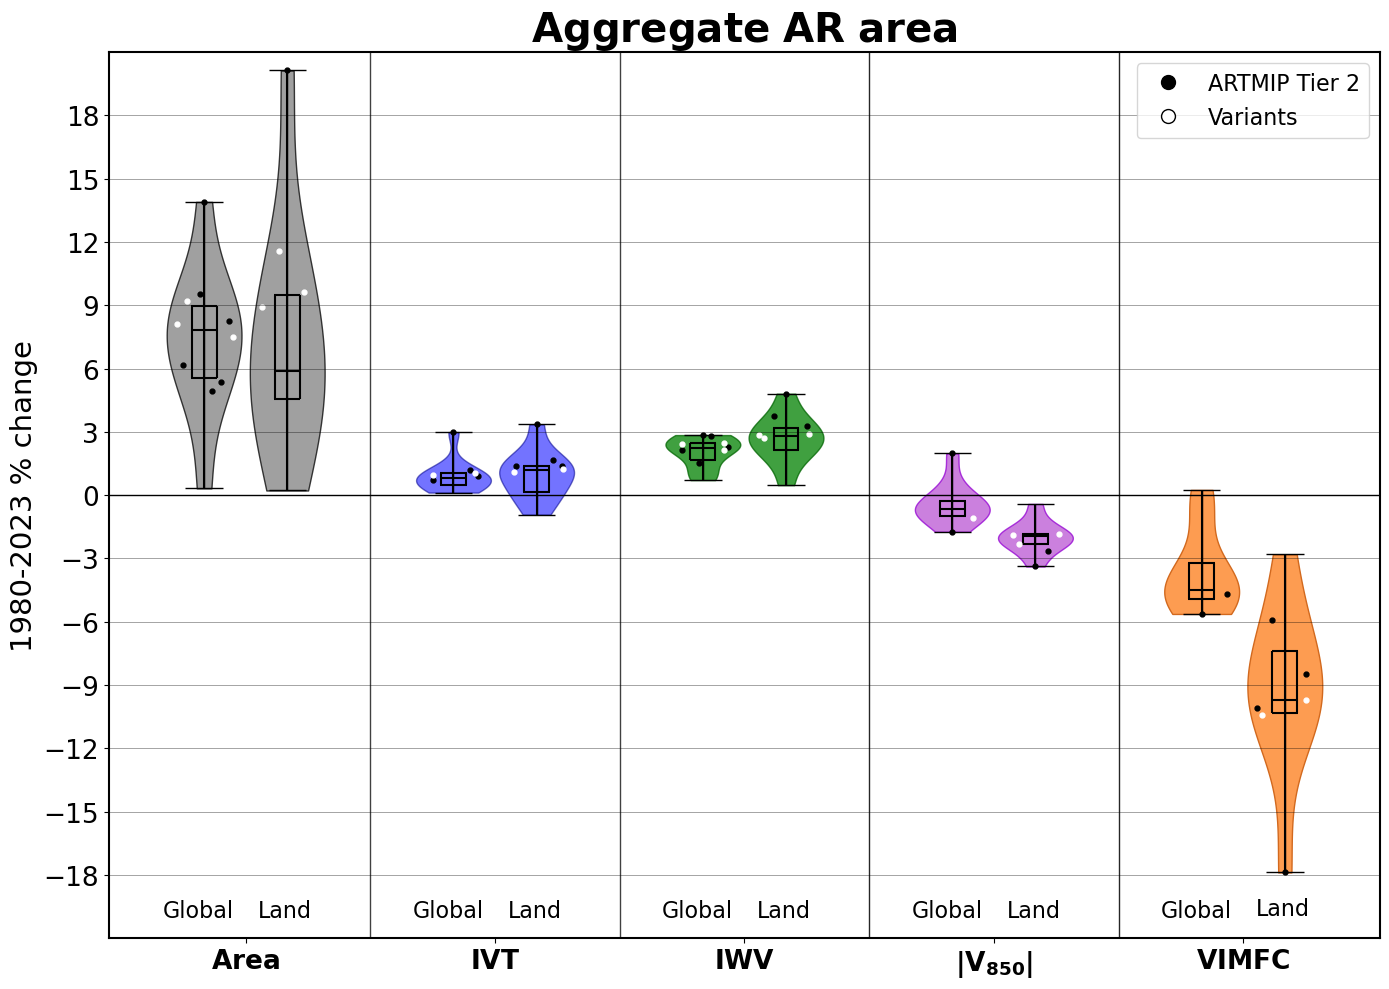

In [20]:
#fig=plt.figure(figsize=(12,12))
#ax=plt.subplot(1,1,1)

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')
    
data=[change_list_area_global,change_list_area_land,[np.nan]*9,change_list_ivt_global,change_list_ivt_land,[np.nan]*9,change_list_iwv_global,change_list_iwv_land,
      [np.nan]*9,change_list_s_global,change_list_s_land,[np.nan]*9,change_list_mfc_global,change_list_mfc_land]

quartile1_area_global=np.percentile(change_list_area_global,25)
quartile2_area_global=np.percentile(change_list_area_global,50)
quartile3_area_global=np.percentile(change_list_area_global,75)

quartile1_area_land=np.percentile(change_list_area_land,25)
quartile2_area_land=np.percentile(change_list_area_land,50)
quartile3_area_land=np.percentile(change_list_area_land,75)

quartile1_ivt_global=np.percentile(change_list_ivt_global,25)
quartile2_ivt_global=np.percentile(change_list_ivt_global,50)
quartile3_ivt_global=np.percentile(change_list_ivt_global,75)
quartile1_ivt_land=np.percentile(change_list_ivt_land,25)
quartile2_ivt_land=np.percentile(change_list_ivt_land,50)
quartile3_ivt_land=np.percentile(change_list_ivt_land,75)

quartile1_iwv_global=np.percentile(change_list_iwv_global,25)
quartile2_iwv_global=np.percentile(change_list_iwv_global,50)
quartile3_iwv_global=np.percentile(change_list_iwv_global,75)
quartile1_iwv_land=np.percentile(change_list_iwv_land,25)
quartile2_iwv_land=np.percentile(change_list_iwv_land,50)
quartile3_iwv_land=np.percentile(change_list_iwv_land,75)

quartile1_s_global=np.percentile(change_list_s_global,25)
quartile2_s_global=np.percentile(change_list_s_global,50)
quartile3_s_global=np.percentile(change_list_s_global,75)
quartile1_s_land=np.percentile(change_list_s_land,25)
quartile2_s_land=np.percentile(change_list_s_land,50)
quartile3_s_land=np.percentile(change_list_s_land,75)

quartile1_mfc_global=np.percentile(change_list_mfc_global,25)
quartile2_mfc_global=np.percentile(change_list_mfc_global,50)
quartile3_mfc_global=np.percentile(change_list_mfc_global,75)
quartile1_mfc_land=np.percentile(change_list_mfc_land,25)
quartile2_mfc_land=np.percentile(change_list_mfc_land,50)
quartile3_mfc_land=np.percentile(change_list_mfc_land,75)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,10))

#positions=[1,2,4,5,7,8,10,11]
#plt.xticks(positions, ['A', 'B', 'C','D','E','F','G','H']) # Set the xticks to the desired positions and labels

ax.set_ylabel('1980-2023 % change',fontsize=21)
#ax.violinplot(change_list)
parts = ax.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=True,widths=0.9)
count=0
N=3
a=0.75
for pc in parts['bodies']:
    
    if count in [0+N-3,1+N-3]:
        pc.set_facecolor('gray')
        pc.set_edgecolor('k')
        pc.set_alpha(a)
    
    if count in [0+N,1+N]:
        pc.set_facecolor('b')
        pc.set_edgecolor('darkblue')
        pc.set_alpha(a-0.2)
    if count in [3+N,4+N]:
        pc.set_facecolor('g')
        pc.set_edgecolor('darkgreen')
        pc.set_alpha(a)
    if count in [6+N,7+N]:
        pc.set_facecolor('mediumorchid')
        pc.set_edgecolor('darkviolet')
        pc.set_alpha(a)
    if count in [9+N,10+N]:
        pc.set_facecolor(plt.cm.Oranges(np.linspace(0,1,10))[4])
        pc.set_edgecolor('chocolate')
        pc.set_alpha(1)
    count=count+1


parts['cmaxes'].set_color('k')
parts['cmins'].set_color('k')
parts['cbars'].set_color('k')

parts['cmaxes'].set_linewidth(1)
parts['cmins'].set_linewidth(1)
parts['cbars'].set_linewidth(1)
#quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75],axis=1)
quartile1,medians,quartile3=[quartile1_area_global,quartile1_area_land,np.nan,quartile1_ivt_global,quartile1_ivt_land,np.nan,
                             quartile1_iwv_global,quartile1_iwv_land,np.nan,
                             quartile1_s_global,quartile1_s_land,np.nan,
                             quartile1_mfc_global,quartile1_mfc_land],[quartile2_area_global,quartile2_area_land,np.nan,quartile2_ivt_global,
                                                                       quartile2_ivt_land,np.nan,
                                                                       quartile2_iwv_global,
                                                                       quartile2_iwv_land,np.nan,
                                                                       quartile2_s_global,
                                                                       quartile2_s_land,np.nan,
                                                                       quartile2_mfc_global,quartile2_mfc_land],[
    quartile3_area_global,quartile3_area_land,np.nan,quartile3_ivt_global,quartile3_ivt_land,np.nan,quartile3_iwv_global,quartile3_iwv_land,np.nan,quartile3_s_global,
    quartile3_s_land,np.nan,quartile3_mfc_global,quartile3_mfc_land]

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

whiskers_min=[min(change_list_area_global),min(change_list_area_land),np.nan,min(change_list_ivt_global),min(change_list_ivt_land),np.nan,
              min(change_list_iwv_global),min(change_list_iwv_land),np.nan,
              min(change_list_s_global),min(change_list_s_land),np.nan,
              min(change_list_mfc_global),min(change_list_mfc_land)]
whiskers_max=[max(change_list_area_global),max(change_list_area_land),np.nan,max(change_list_ivt_global),max(change_list_ivt_land),np.nan,
              max(change_list_iwv_global),max(change_list_iwv_land),np.nan,
              max(change_list_s_global),max(change_list_s_land),np.nan,
              max(change_list_mfc_global),max(change_list_mfc_land)]

inds = np.arange(1, len(medians) + 1)
#ax.scatter(inds, medians, marker='o', color='white', s=200, zorder=3)

#ax.scatter(inds, medians, marker='o', color='None',edgecolor='k',mew=2, s=150, zorder=3)
#ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=14)

#ax.vlines(inds[0], quartile1[0], quartile3[0], color='b', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[1], quartile1[1], quartile3[1], color='b', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[3], quartile1[3], quartile3[3], color='g', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[4], quartile1[4], quartile3[4], color='g', linestyle='-', lw=42,alpha=1)

#ax.vlines(inds[6], quartile1[6], quartile3[6], color='mediumorchid', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[7], quartile1[7], quartile3[7], color='mediumorchid', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[9], quartile1[9], quartile3[9], color=plt.cm.Oranges(np.linspace(0,1,10))[5], linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[10], quartile1[10], quartile3[10], color=plt.cm.Oranges(np.linspace(0,1,10))[5], linestyle='-', lw=42,alpha=1)


ax.vlines([x-0.15 for x in inds], quartile1, quartile3, color='k', linestyle='-', lw=1.5)
ax.vlines([x+0.15 for x in inds], quartile1, quartile3, color='k', linestyle='-', lw=1.5)
ax.hlines(quartile1,[x-0.159 for x in inds], [x+0.159 for x in inds], color='k', linestyle='-', lw=1.5)
ax.hlines(quartile3,[x-0.159 for x in inds], [x+0.159 for x in inds], color='k', linestyle='-', lw=1.5)
ax.hlines(medians,[x-0.152 for x in inds], [x+0.152 for x in inds], color='k', linestyle='-', lw=1.5)

ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1.5)
ax.set_title(r'$\bf{Aggregate}$'+' '+r'$\bf{AR}$'+' '+r'$\bf{area}$',fontsize=29,pad=5)
ax.tick_params(labelsize=19)
plt.axhline(y=0,color='k',linewidth=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
#ax.grid(True,linewidth=2)

#ax.plot(1,medians[0],marker='o',color='None',markeredgecolor='k',mew=2,markersize=15,zorder=5)
#for change in change_list_ivt[:-3]:
#    ax.plot(1,change,marker='_',color='k',markersize=15,mew=2)
#for change in change_list_ivt[-3:]:
#    ax.plot(1,change,marker='o',color='w',markersize=5,zorder=5)
#for change in change_list_iwv[-3:]:
#    ax.plot(2,change,marker='o',color='w',markersize=5,zorder=5)
#for change in change_list_s[-3:]:
#    ax.plot(3,change,marker='o',color='w',markersize=5,zorder=5)
#for change in change_list_mfc[-3:]:
#    ax.plot(4,change,marker='o',color='w',markersize=5,zorder=5)

x=0.0675
plt.xticks([1.5,4.5,7.5,10.5,13.5],labels=[r'$\bf{Area}$',r'$\bf{IVT}$',r'$\bf{IWV}$',r'$\bf{|V_{850}|}$',r'$\bf{VIMFC}$'],rotation=0)
ax.text(0.575-x,-20,'Global',fontsize=16,rotation=0)
ax.text(1.72-x,-20,'Land',fontsize=16,rotation=0)

ax.text(3.575-x,-20,'Global',fontsize=16,rotation=0)
ax.text(4.72-x,-20,'Land',fontsize=16,rotation=0)

ax.text(6.575-x,-20,'Global',fontsize=16,rotation=0)
ax.text(7.72-x,-20,'Land',fontsize=16,rotation=0)

ax.text(9.575-x,-20,'Global',fontsize=16,rotation=0)
ax.text(10.72-x,-20,'Land',fontsize=16,rotation=0)

ax.text(12.575-x,-20,'Global',fontsize=16,rotation=0)
ax.text(13.72-x,-19.9,'Land',fontsize=16,rotation=0)

#plt.yticks([-9,-6,-3,0,3,6,9])
ax.set_ylim(-21,21)

if sigs_list_global_area[0]<=0.03:
    ax.plot(0.75,change_list_area_global[0],marker='o',color='k',markersize=3.5)
if sigs_list_global_area[1]<=0.03:
    ax.plot(0.95,change_list_area_global[1],marker='o',color='k',markersize=3.5)
if sigs_list_global_area[2]<=0.03:
    ax.plot(1.3,change_list_area_global[2],marker='o',color='k',markersize=3.5)
if sigs_list_global_area[3]<=0.03:
    ax.plot(1.2,change_list_area_global[3],marker='o',color='k',markersize=3.5)
if sigs_list_global_area[4]<=0.03:
    ax.plot(1.0,change_list_area_global[4],marker='o',color='k',markersize=3.5)
if sigs_list_global_area[5]<=0.03:
    ax.plot(1.0,change_list_area_global[5],marker='o',color='k',markersize=3.5)
if sigs_list_global_area[6]<=0.03:
    ax.plot(1.1,change_list_area_global[6],marker='o',color='k',markersize=3.5)
if sigs_list_global_area[7]<=0.03:
    ax.plot(0.8,change_list_area_global[7],marker='o',color='w',markersize=3.5)
if sigs_list_global_area[8]<=0.03:
    ax.plot(0.67,change_list_area_global[8],marker='o',color='w',markersize=3.5)
if sigs_list_global_area[9]<=0.03:
    ax.plot(1.35,change_list_area_global[9],marker='o',color='w',markersize=3.5)
    
n=1
if sigs_list_land_area[0]<=0.03:
    ax.plot(0.75+n,change_list_area_land[0],marker='o',color='k',markersize=3.5)
if sigs_list_land_area[1]<=0.03:
    ax.plot(0.95+n,change_list_area_land[1],marker='o',color='k',markersize=3.5)
if sigs_list_land_area[2]<=0.03:
    ax.plot(1.3+n,change_list_area_land[2],marker='o',color='k',markersize=3.5)
if sigs_list_land_area[3]<=0.03:
    ax.plot(1.2+n,change_list_area_land[3],marker='o',color='k',markersize=3.5)
if sigs_list_land_area[4]<=0.03:
    ax.plot(1.0+n,change_list_area_land[4],marker='o',color='k',markersize=3.5)
if sigs_list_land_area[5]<=0.03:
    ax.plot(1.0+n,change_list_area_land[5],marker='o',color='k',markersize=3.5)
if sigs_list_land_area[6]<=0.03:
    ax.plot(1.1+n,change_list_area_land[6],marker='o',color='k',markersize=3.5)
if sigs_list_land_area[7]<=0.03:
    ax.plot(0.9+n,change_list_area_land[7],marker='o',color='w',markersize=3.5)
if sigs_list_land_area[8]<=0.03:
    ax.plot(1.2+n,change_list_area_land[8],marker='o',color='w',markersize=3.5)
if sigs_list_land_area[9]<=0.03:
    ax.plot(0.7+n,change_list_area_land[9],marker='o',color='w',markersize=3.5)
    
n=3
if sigs_list_global_ivt[0]<=0.03:
    ax.plot(0.75+n,change_list_ivt_global[0],marker='o',color='k',markersize=3.5)
if sigs_list_global_ivt[1]<=0.03:
    ax.plot(0.75+n,change_list_ivt_global[1],marker='o',color='k',markersize=3.5)
if sigs_list_global_ivt[2]<=0.03:
    ax.plot(1.3+n,change_list_ivt_global[2],marker='o',color='k',markersize=3.5)
if sigs_list_global_ivt[3]<=0.03:
    ax.plot(1.2+n,change_list_ivt_global[3],marker='o',color='k',markersize=3.5)
if sigs_list_global_ivt[4]<=0.03:
    ax.plot(1.0+n,change_list_ivt_global[4],marker='o',color='k',markersize=3.5)
if sigs_list_global_ivt[5]<=0.03:
    ax.plot(1.0+n,change_list_ivt_global[5],marker='o',color='k',markersize=3.5)
if sigs_list_global_ivt[6]<=0.03:
    ax.plot(1.1+n,change_list_ivt_global[6],marker='o',color='k',markersize=3.5)
if sigs_list_global_ivt[7]<=0.03:
    ax.plot(1.0+n,change_list_ivt_global[7],marker='o',color='w',markersize=3.5)
if sigs_list_global_ivt[8]<=0.03:
    ax.plot(0.75+n,change_list_ivt_global[8],marker='o',color='w',markersize=3.5)
if sigs_list_global_ivt[9]<=0.03:
    ax.plot(1.26+n,change_list_ivt_global[9],marker='o',color='w',markersize=3.5)
    
n=4
if sigs_list_land_ivt[0]<=0.03:
    ax.plot(0.75+n,change_list_ivt_land[0],marker='o',color='k',markersize=3.5)
if sigs_list_land_ivt[1]<=0.03:
    ax.plot(0.75+n,change_list_ivt_land[1],marker='o',color='k',markersize=3.5)
if sigs_list_land_ivt[2]<=0.03:
    ax.plot(1.3+n,change_list_ivt_land[2],marker='o',color='k',markersize=3.5)
if sigs_list_land_ivt[3]<=0.03:
    ax.plot(1.2+n,change_list_ivt_land[3],marker='o',color='k',markersize=3.5)
if sigs_list_land_ivt[4]<=0.03:
    ax.plot(1.0+n,change_list_ivt_land[4],marker='o',color='k',markersize=3.5)
if sigs_list_land_ivt[5]<=0.03:
    ax.plot(1.0+n,change_list_ivt_land[5],marker='o',color='k',markersize=3.5)
if sigs_list_land_ivt[6]<=0.03:
    ax.plot(1.3+n,change_list_ivt_land[6],marker='o',color='k',markersize=3.5)
if sigs_list_land_ivt[7]<=0.03:
    ax.plot(0.8+n,change_list_ivt_land[7],marker='o',color='w',markersize=3.5)
if sigs_list_land_ivt[8]<=0.03:
    ax.plot(0.73+n,change_list_ivt_land[8],marker='o',color='w',markersize=3.5)
if sigs_list_land_ivt[9]<=0.03:
    ax.plot(1.32+n,change_list_ivt_land[9],marker='o',color='w',markersize=3.5)
    
    
n=6
if sigs_list_global_iwv[0]<=0.03:
    ax.plot(0.95+n,change_list_iwv_global[0],marker='o',color='k',markersize=3.5)
if sigs_list_global_iwv[1]<=0.03:
    ax.plot(0.75+n,change_list_iwv_global[1],marker='o',color='k',markersize=3.5)
if sigs_list_global_iwv[2]<=0.03:
    ax.plot(1.3+n,change_list_iwv_global[2],marker='o',color='k',markersize=3.5)
if sigs_list_global_iwv[3]<=0.03:
    ax.plot(1.2+n,change_list_iwv_global[3],marker='o',color='k',markersize=3.5)
if sigs_list_global_iwv[4]<=0.03:
    ax.plot(1.0+n,change_list_iwv_global[4],marker='o',color='k',markersize=3.5)
if sigs_list_global_iwv[5]<=0.03:
    ax.plot(1.0+n,change_list_iwv_global[5],marker='o',color='k',markersize=3.5)
if sigs_list_global_iwv[6]<=0.03:
    ax.plot(1.1+n,change_list_iwv_global[6],marker='o',color='k',markersize=3.5)
if sigs_list_global_iwv[7]<=0.03:
    ax.plot(1.25+n,change_list_iwv_global[7],marker='o',color='w',markersize=3.5)
if sigs_list_global_iwv[8]<=0.03:
    ax.plot(0.75+n,change_list_iwv_global[8],marker='o',color='w',markersize=3.5)
if sigs_list_global_iwv[9]<=0.03:
    ax.plot(1.25+n,change_list_iwv_global[9],marker='o',color='w',markersize=3.5)
    
n=7
if sigs_list_land_iwv[0]<=0.03:
    ax.plot(0.95+n,change_list_iwv_land[0],marker='o',color='k',markersize=3.5)
if sigs_list_land_iwv[1]<=0.03:
    ax.plot(0.85+n,change_list_iwv_land[1],marker='o',color='k',markersize=3.5)
if sigs_list_land_iwv[2]<=0.03:
    ax.plot(1.25+n,change_list_iwv_land[2],marker='o',color='k',markersize=3.5)
if sigs_list_land_iwv[3]<=0.03:
    ax.plot(1.2+n,change_list_iwv_land[3],marker='o',color='k',markersize=3.5)
if sigs_list_land_iwv[4]<=0.03:
    ax.plot(1.0+n,change_list_iwv_land[4],marker='o',color='k',markersize=3.5)
if sigs_list_land_iwv[5]<=0.03:
    ax.plot(1.0+n,change_list_iwv_land[5],marker='o',color='k',markersize=3.5)
if sigs_list_land_iwv[6]<=0.03:
    ax.plot(1.25+n,change_list_iwv_land[6],marker='o',color='k',markersize=3.5)
if sigs_list_land_iwv[7]<=0.03:
    ax.plot(0.74+n,change_list_iwv_land[7],marker='o',color='w',markersize=3.5)
if sigs_list_land_iwv[8]<=0.03:
    ax.plot(0.67+n,change_list_iwv_land[8],marker='o',color='w',markersize=3.5)
if sigs_list_land_iwv[9]<=0.03:
    ax.plot(1.28+n,change_list_iwv_land[9],marker='o',color='w',markersize=3.5)
    
    
n=9
if sigs_list_global_s[0]<=0.03:
    ax.plot(0.95+n,change_list_s_global[0],marker='o',color='k',markersize=3.5)
if sigs_list_global_s[1]<=0.03:
    ax.plot(0.75+n,change_list_s_global[1],marker='o',color='k',markersize=3.5)
if sigs_list_global_s[2]<=0.03:
    ax.plot(1.3+n,change_list_s_global[2],marker='o',color='k',markersize=3.5)
if sigs_list_global_s[3]<=0.03:
    ax.plot(1.2+n,change_list_s_global[3],marker='o',color='k',markersize=3.5)
if sigs_list_global_s[4]<=0.03:
    ax.plot(1.0+n,change_list_s_global[4],marker='o',color='k',markersize=3.5)
if sigs_list_global_s[5]<=0.03:
    ax.plot(1.0+n,change_list_s_global[5],marker='o',color='k',markersize=3.5)
if sigs_list_global_s[6]<=0.03:
    ax.plot(1.0+n,change_list_s_global[6],marker='o',color='k',markersize=3.5)
if sigs_list_global_s[7]<=0.03:
    ax.plot(1.25+n,change_list_s_global[7],marker='o',color='w',markersize=3.5)
if sigs_list_global_s[8]<=0.03:
    ax.plot(0.75+n,change_list_s_global[8],marker='o',color='w',markersize=3.5)
if sigs_list_global_s[9]<=0.03:
    ax.plot(1.25+n,change_list_s_global[9],marker='o',color='w',markersize=3.5)
    
n=10
if sigs_list_land_s[0]<=0.03:
    ax.plot(0.95+n,change_list_s_land[0],marker='o',color='k',markersize=3.5)
if sigs_list_land_s[1]<=0.03:
    ax.plot(0.85+n,change_list_s_land[1],marker='o',color='k',markersize=3.5)
if sigs_list_land_s[2]<=0.03:
    ax.plot(1.2+n,change_list_s_land[2],marker='o',color='k',markersize=3.5)
if sigs_list_land_s[3]<=0.03:
    ax.plot(1.1+n,change_list_s_land[3],marker='o',color='k',markersize=3.5)
if sigs_list_land_s[4]<=0.03:
    ax.plot(1.0+n,change_list_s_land[4],marker='o',color='k',markersize=3.5)
if sigs_list_land_s[5]<=0.03:
    ax.plot(1.0+n,change_list_s_land[5],marker='o',color='k',markersize=3.5)
if sigs_list_land_s[6]<=0.03:
    ax.plot(1.15+n,change_list_s_land[6],marker='o',color='k',markersize=3.5)
if sigs_list_land_s[7]<=0.03:
    ax.plot(0.8+n,change_list_s_land[7],marker='o',color='w',markersize=3.5)
if sigs_list_land_s[8]<=0.03:
    ax.plot(0.73+n,change_list_s_land[8],marker='o',color='w',markersize=3.5)
if sigs_list_land_s[9]<=0.03:
    ax.plot(1.28+n,change_list_s_land[9],marker='o',color='w',markersize=3.5)

n=12
if sigs_list_global_mfc[0]<=0.03:
    ax.plot(0.95+n,change_list_mfc_global[0],marker='o',color='k',markersize=3.5)
if sigs_list_global_mfc[1]<=0.03:
    ax.plot(0.75+n,change_list_mfc_global[1],marker='o',color='k',markersize=3.5)
if sigs_list_global_mfc[2]<=0.03:
    ax.plot(1.3+n,change_list_mfc_global[2],marker='o',color='k',markersize=3.5)
if sigs_list_global_mfc[3]<=0.03:
    ax.plot(1.3+n,change_list_mfc_global[3],marker='o',color='k',markersize=3.5)
if sigs_list_global_mfc[4]<=0.03:
    ax.plot(1.0+n,change_list_mfc_global[4],marker='o',color='k',markersize=3.5)
if sigs_list_global_mfc[5]<=0.03:
    ax.plot(1.0+n,change_list_mfc_global[5],marker='o',color='k',markersize=3.5)
if sigs_list_global_mfc[6]<=0.03:
    ax.plot(1.1+n,change_list_mfc_global[6],marker='o',color='w',markersize=3.5)
if sigs_list_global_mfc[7]<=0.03:
    ax.plot(1.25+n,change_list_mfc_global[7],marker='o',color='w',markersize=3.5)
if sigs_list_land_s[8]<=0.03:
    ax.plot(0.73+n,change_list_s_land[8],marker='o',color='w',markersize=3.5)

n=13
if sigs_list_land_mfc[0]<=0.03:
    ax.plot(1+n,change_list_mfc_land[0],marker='o',color='k',markersize=3.5)
if sigs_list_land_mfc[1]<=0.03:
    ax.plot(0.85+n,change_list_mfc_land[1],marker='o',color='k',markersize=3.5)
if sigs_list_land_mfc[2]<=0.03:
    ax.plot(1.25+n,change_list_mfc_land[2],marker='o',color='k',markersize=3.5)
if sigs_list_land_mfc[3]<=0.03:
    ax.plot(1.2+n,change_list_mfc_land[3],marker='o',color='k',markersize=3.5)
if sigs_list_land_mfc[4]<=0.03:
    ax.plot(0.67+n,change_list_mfc_land[4],marker='o',color='k',markersize=3.5)
if sigs_list_land_mfc[5]<=0.03:
    ax.plot(0.67+n,change_list_mfc_land[5],marker='o',color='k',markersize=3.5,label='ARTMIP Tier 2')
if sigs_list_land_mfc[6]<=0.03:
    ax.plot(1.25+n,change_list_mfc_land[6],marker='o',color='w',markersize=3.5,label='Variants')
if sigs_list_land_mfc[7]<=0.03:
    ax.plot(0.73+n,change_list_mfc_land[7],marker='o',color='w',markersize=3.5)
if sigs_list_land_s[8]<=0.03:
    ax.plot(0.73+n,change_list_s_land[8],marker='o',color='w',markersize=3.5)

#ax.text(0.8,9.5,'n=10',fontsize=30)
#ax.text(1.8,9.5,'n=10',fontsize=30)
#ax.text(2.8,9.5,'n=10',fontsize=30)
#ax.text(3.8,9.5,'n=8',fontsize=30)

from matplotlib.lines import Line2D
point1 = Line2D([0], [0], label='ARTMIP Tier 2', marker='o', markersize=10, 
         markeredgecolor='k', markerfacecolor='k', linestyle='')
point2 = Line2D([0], [0], label='Variants', marker='o', markersize=10, 
         markeredgecolor='k', markerfacecolor='w', linestyle='')
handles=[point1,point2]
plt.legend(handles=handles,loc='upper right',fontsize=16)
#plt.legend(loc='upper right')
#plt.axhline(y=5,color='k',linewidth=0.5,alpha=0.5)
#plt.axhline(y=10,color='k',linewidth=0.5,alpha=0.5)
#plt.axhline(y=15,color='k',linewidth=0.5,alpha=0.5)
#plt.axhline(y=-5,color='k',linewidth=0.5,alpha=0.5)
#plt.axhline(y=-10,color='k',linewidth=0.5,alpha=0.5)
#plt.axhline(y=-15,color='k',linewidth=0.5,alpha=0.5)
plt.yticks(np.arange(-18,21,3))
for i in np.arange(-18,21,3):
    plt.axhline(y=i,color='k',linewidth=0.5,alpha=0.5)
    
plt.axvline(x=3,color='k',linewidth=1,alpha=0.75)
plt.axvline(x=6,color='k',linewidth=1,alpha=0.75)
plt.axvline(x=9,color='k',linewidth=1,alpha=0.85)
plt.axvline(x=12,color='k',linewidth=1,alpha=0.85)
plt.tight_layout()
plt.show()

In [21]:
fig.savefig('/Users/lexihenny/big_plot_test_1.png',dpi=200)

In [ ]:
print(len(change_list_mfc_land))